#  Install package

In [568]:
# ! pip install pyvis
# ! pip install networkx
# ! pip install dash
# ! pip install altair
# ! pip install panel

# Import package

In [569]:
import os
import requests
import networkx as nx
import pandas as pd
import geopandas as gpd
from pyvis.network import Network
import openai
from IPython.display import display, HTML, Code
from IPython.display import clear_output


# Define Solution class
Please run the following cell to define the functions

In [570]:
# %load_ext autoreload
# %autoreload 2

import LLM_Geo_Constants as constants
import helper
# import LLM_Geo_kernel.Solution as Solution

from LLM_Geo_kernel import Solution

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Demonstration Cases

## Input task and data desciption

In [571]:
# Case 1: population living near hazardous wastes

'''
TASK = r"""1) Find out the total population that lives within a tract that contain hazardous waste facilities. The study area is North Carolina, US.
2) Generate a map to show the spatial distribution of population at the tract level and highlight the borders of tracts that have hazardous waste facilities.
"""

DATA_LOCATIONS = ["NC hazardous waste facility ESRI shape file location: https://github.com/gladcolor/LLM- Geo/raw/master/overlay_analysis/Hazardous_Waste_Sites.zip.",
                  "NC tract boundary shapefile location: https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/tract_shp_37.zip. The tract id column is 'Tract'.",
                  "NC tract population CSV file location: https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/NC_tract_population.csv. The population is stored in 'TotalPopulation' column. The tract ID column is 'GEOID'."
                 ]


task_name ='Resident_at_risk_counting'
'''

# Case 2: mobility data retrieval and visulization
task_name ='France_mobility_changes_2020'
TASK = r'''
1) Show the monthly change rates of each administrative regions in a France map. Each month is a sub-map in a map matrix. The base of the change rate is January 2020. 
2) Draw a line chart to show the monthly change rate trends of all administrative regeions.

'''

DATA_LOCATIONS = ["ESRI shapefile for France administrative regions:" + \
                  "https://github.com/gladcolor/LLM-Geo/raw/master/REST_API/France.zip. " + \
                  "The 'GID_1' column is the administrative region code, 'NAME_1' column is the administrative region name.",
                  "REST API url with parameters for mobility data access:" + \
                  "http://gis.cas.sc.edu/GeoAnalytics/REST?operation=get_daily_movement_for_all_places&source=twitter&scale=world_first_level_admin&begin=01/01/2020&end=12/31/2020." + \
                  "The response is in CSV format. There are three columns in the response: " + \
                  "place,date (format:2020-01-07), and intra_movement. 'place' column is the administractive region code of every country; codes for France administrative regions start with 'FRA'.",
                 ]





# Case 3: COVID-19 prevalence trend
"""
task_name ='COVID_death_rate'
TASK = r'''1) Draw a map to show the death rate (death/case) of COVID-19 among the countiguous US counties in 2020. Use the accumulated COVID-19 data of 2020.12.31 to compute the death rate.
2) The map size is 15*10 inches, make it beautiful.  
3) Draw a scatter chart to show the correlation and trend line between the death rate and the senior resident rate, including the r-square and p-value.
'''

DATA_LOCATIONS = [
                  r"COVID-19 data case in 2020 (county-level): https://github.com/nytimes/covid-19-data/raw/master/us-counties-2020.csv. This data is for daily accumulated COVID cases and deaths for each county in the US. There are 5 columns: date (format: 2021-02-01), county, state, fips, cases, deaths. ",   
                  r"Contiguous US county boundary (ESRI shapefile): https://github.com/gladcolor/spatial_data/raw/master/contiguous_counties.zip. The county FIPS column is 'GEOID'. ",
                  r"Census data (ACS2020): https://raw.githubusercontent.com/gladcolor/spatial_data/master/Demography/ACS2020_5year_county.csv. THe needed columns are: 'FIPS', 'Total Population', 'Total Population: 65 to 74 Years', 'Total Population: 75 to 84 Years', 'Total Population: 85 Years and Over'. Drop rows with NaN cells after loading the used columns.",
                 ]

"""

"""
# Case 4: Hospital_accessibility
task_name ='Hospital_accessibility'

TASK = r'''
For each zipcode area in South Carolina (SC), calculate the distance from the centroid of the zipcode area to its nearest hospital, and then create a choropleth distance map (unit: km), also show the hospital.
'''

# TASK = r'Diplay the  zipcode area in South Carolina (SC) and SC hospital locations in a  map.'

DATA_LOCATIONS = [
r"SC zipcode boundary shapefile: https://github.com/GIBDUSC/test/raw/master/sc_zip_boundary.zip, the map projection is WGS1984.",
r"SC hospitals:  https://github.com/gladcolor/spatial_data/raw/master/South_Carolina/SC_hospitals_with_emergency_room_cleaned.csv, location columns: longitude in 'POINT_X' column, latitude in 'POINT_Y' column.",          
]
"""

  
save_dir = os.path.join(os.getcwd(), task_name)
os.makedirs(save_dir, exist_ok=True)

# create graph
# model=r"gpt-3.5-turbo"
model=r"gpt-4"
solution = Solution(
                    task=TASK,
                    task_name=task_name,
                    save_dir=save_dir,
                    data_locations=DATA_LOCATIONS,
                    model=model,
                    )
print("Prompt to get solution graph:\n")
print(solution.graph_prompt)

Prompt to get solution graph:

Your role: A professional Geo-information scientist and developer good at Python. 
Task: Generate a graph (data structure) only, whose nodes are (1) a series of consecutive steps and (2) data to solve this question:  
 
1) Show the monthly change rates of each administrative regions in a France map. Each month is a sub-map in a map matrix. The base of the change rate is January 2020. 
2) Draw a line chart to show the monthly change rate trends of all administrative regeions.

 
Your reply needs to meet these requirements: 
 1. Think step by step.
2. Steps and data (both input and output) form a graph stored in NetworkX. Disconnected components are NOT allowed.
3. Each step is a data process operation: the input can be data paths or variables, and the output can be data paths or variables.
4. There are two types of nodes: a) operation node, and b) data node (both input and output data). These nodes are also input nodes for the next operation node.
5. The i

## Get graph code from GPT API

In [572]:
response_for_graph = solution.get_LLM_response_for_graph() 
solution.graph_response = response_for_graph
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_graph, language='python'))

import networkx as nx

G = nx.DiGraph()

# Add nodes and edges for the graph
# 1 Load France administrative regions shapefile
G.add_node("france_admin_shp_url", node_type="data", data_path="https://github.com/gladcolor/LLM-Geo/raw/master/REST_API/France.zip", description="France administrative regions shapefile")

G.add_node("load_france_admin_shp", node_type="operation", description="Load France administrative regions shapefile")
G.add_edge("france_admin_shp_url", "load_france_admin_shp")

G.add_node("france_admin_gdf", node_type="data", description="France administrative regions GeoDataFrame")
G.add_edge("load_france_admin_shp", "france_admin_gdf")

# 2 Load REST API URL for mobility data
G.add_node("mobility_api_url", node_type="data", data_path="http://gis.cas.sc.edu/GeoAnalytics/REST?operation=get_daily_movement_for_all_places&source=twitter&scale=world_first_level_admin&begin=01/01/2020&end=12/31/2020", description="Resident income tax in France REST API URL")

G.add_node("load_mobility_data", node_type="operation", description="Load mobility data from REST API")
G.add_edge("mobility_api_url", "load_mobility_data")

G.add_node("mobility_data_df", node_type="data", description="Mobility data DataFrame")
G.add_edge("load_mobility_data", "mobility_data_df")

# 3 Preprocess mobility data for France regions
G.add_node("preprocess_mobility_data", node_type="operation", description="Filter and preprocess mobility data for France regions")
G.add_edge("mobility_data_df", "preprocess_mobility_data")

G.add_node("france_mobility_data_df", node_type="data", description="France mobility data DataFrame")
G.add_edge("preprocess_mobility_data", "france_mobility_data_df")

# 4 Calculate monthly change rates of each administrative region
G.add_node("calc_change_rates", node_type="operation", description="Calculate monthly change rates of each administrative region")
G.add_edge("france_mobility_data_df", "calc_change_rates")

G.add_node("change_rates_df", node_type="data", description="Monthly change rates DataFrame")
G.add_edge("calc_change_rates", "change_rates_df")

# 5 Join change rates with France administrative regions GeoDataFrame
G.add_node("join_change_rates", node_type="operation", description="Join change rates with France administrative regions GeoDataFrame")
G.add_edge("change_rates_df", "join_change_rates")
G.add_edge("france_admin_gdf", "join_change_rates")

G.add_node("france_change_rates_gdf", node_type="data", description="France administrative regions with change rates GeoDataFrame")
G.add_edge("join_change_rates", "france_change_rates_gdf")

# 6 Create sub-maps for each month and France map matrix
G.add_node("create_sub_maps", node_type="operation", description="Create sub-maps for each month and France map matrix")
G.add_edge("france_change_rates_gdf", "create_sub_maps")

G.add_node("france_map_matrix", node_type="data", description="France map matrix with sub-maps for each month")
G.add_edge("create_sub_maps", "france_map_matrix")

# 7 Draw line chart to show monthly change rate trends of all regions
G.add_node("draw_line_chart", node_type="operation", description="Draw line chart to show monthly change rate trends of all regions")
G.add_edge("change_rates_df", "draw_line_chart")

G.add_node("monthly_change_rate_chart", node_type="data", description="Monthly change rate trends line chart")
G.add_edge("draw_line_chart", "monthly_change_rate_chart")

# Save the graph to GraphML file
nx.write_graphml(G, "E:\\Research\\LLM-Geo\\France_mobility_changes_2020\\France_mobility_changes_2020.graphml")

## Execute code to generate the solution graphto generate the solution graph

In [573]:
exec(solution.code_for_graph)
solution_graph = solution.load_graph_file()

# Show the graph
G = nx.read_graphml(solution.graph_file)  
nt = helper.show_graph(G)
html_name = os.path.join(os.getcwd(), solution.task_name + '.html')  
# HTML file should in the same directory. See:
# https://stackoverflow.com/questions/65564916/error-displaying-pyvis-html-inside-jupyter-lab-cell
nt.show(name=html_name)
# html_name

E:\Research\LLM-Geo\France_mobility_changes_2020.html


## Generate prompts and code for operations (functions)

In [574]:
operations = solution.get_LLM_responses_for_operations()
solution.save_solution()

all_operation_code_str = '\n'.join([operation['operation_code'] for operation in operations])

clear_output(wait=True)
display(Code(all_operation_code_str, language='python'))

import geopandas as gpd

def load_france_admin_shp(france_admin_shp_url='https://github.com/gladcolor/LLM-Geo/raw/master/REST_API/France.zip'):
    # Description: Load France administrative regions shapefile
    # france_admin_shp_url: France administrative regions shapefile URL
    france_admin_gdf = gpd.read_file(france_admin_shp_url)
    return france_admin_gdf
import pandas as pd
import requests
from io import StringIO

def load_mobility_data(mobility_api_url='http://gis.cas.sc.edu/GeoAnalytics/REST?operation=get_daily_movement_for_all_places&source=twitter&scale=world_first_level_admin&begin=01/01/2020&end=12/31/2020'):
    # Description: Load mobility data from REST API
    # mobility_api_url: REST API URL for accessing mobility data
    response = requests.get(mobility_api_url)
    response_text = response.text
    mobility_data_df = pd.read_csv(StringIO(response_text))
    return mobility_data_df
import pandas as pd
import geopandas as gpd
from urllib.request import urlretrieve
import zipfile
from io import BytesIO

def preprocess_mobility_data(mobility_data_df):
    """
    Description: Filter and preprocess mobility data for France regions
    Input:
        - mobility_data_df: DataFrame of mobility data for all first level administrative regions
    Output:
        - france_mobility_data_df: DataFrame of preprocessed mobility data for France regions
    """

    # Filter out France administrative regions using 'place' column
    france_mobility_data_df = mobility_data_df[mobility_data_df['place'].str.startswith('FRA')]

    # Convert date column to datetime object
    france_mobility_data_df['date'] = pd.to_datetime(france_mobility_data_df['date'])

    # Extract month from date column
    france_mobility_data_df['month'] = france_mobility_data_df['date'].dt.month

    # Group by place and month and calculate the mean intra_movement for each group
    france_mobility_data_df = france_mobility_data_df.groupby(['place', 'month']).mean().reset_index()

    return france_mobility_data_df
import pandas as pd

def calc_change_rates(france_mobility_data_df):
    """
    Description: Calculate monthly change rates of each administrative region.
    Input:
        - france_mobility_data_df: DataFrame of preprocessed mobility data for France regions
    Output:
        - change_rates_df: DataFrame of monthly change rates for each administrative region based on January 2020 data
    """

    # Calculate the baseline mobility for January 2020
    baseline_mobility_df = france_mobility_data_df[france_mobility_data_df['month'] == 1][['place', 'intra_movement']]
    baseline_mobility_df.rename(columns={'intra_movement': 'baseline_mobility'}, inplace=True)

    # Merge baseline mobility with France mobility data
    change_rates_df = pd.merge(france_mobility_data_df, baseline_mobility_df, on='place', how='inner')

    # Calculate monthly change rate of intra_movement for each administrative region
    change_rates_df['change_rate'] = (change_rates_df['intra_movement'] - change_rates_df['baseline_mobility']) / change_rates_df['baseline_mobility'] * 100

    # Drop the baseline_mobility and intra_movement columns
    change_rates_df.drop(columns=['intra_movement', 'baseline_mobility'], inplace=True)

    return change_rates_df
def join_change_rates(france_admin_gdf, change_rates_df):
    """
    Description: Join change rates with France administrative regions GeoDataFrame
    Input:
        - france_admin_gdf: GeoDataFrame of France administrative regions shapefile
        - change_rates_df: DataFrame of monthly change rates for each administrative region
    Output:
        - france_change_rates_gdf: GeoDataFrame with France administrative regions and change rates data
    """

    # Convert 'GID_1' column in france_admin_gdf and 'place' column in change_rates_df to string type without leading zeros
    france_admin_gdf['GID_1'] = france_admin_gdf['GID_1'].astype(str).str.strip('0')
    change_rates_df['place'] = change_rates_df['p

In [575]:
all_operation_code_str = '\n'.join([operation['operation_code'] for operation in operations])
# print(all_operation_code_str)

## Generate prompts and code for assembly program

In [576]:
assembly_LLM_response = solution.get_LLM_assembly_response()
solution.assembly_LLM_response = assembly_LLM_response
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_assembly, language='python'))

def main():
    france_admin_gdf = load_france_admin_shp()
    mobility_data_df = load_mobility_data()
    france_mobility_data_df = preprocess_mobility_data(mobility_data_df)
    change_rates_df = calc_change_rates(france_mobility_data_df)
    france_change_rates_gdf = join_change_rates(france_admin_gdf, change_rates_df)
    france_map_matrix = create_sub_maps(france_change_rates_gdf)

    # Save sub-maps to files
    for index, sub_map in enumerate(france_map_matrix, start=1):
        sub_map.savefig(f"france_monthly_change_rate_map_{index}.png")

    # Draw and save line chart
    monthly_change_rate_chart = draw_line_chart(change_rates_df)
    plt.savefig("monthly_change_rate_trends.png")
    plt.show()

if __name__ == "__main__":
    main()

## Execute assembly code

In [577]:
all_code = all_operation_code_str + '\n' + solution.code_for_assembly

# print(solution.code_for_assembly)
display(Code(all_code, language='python'))

import geopandas as gpd

def load_france_admin_shp(france_admin_shp_url='https://github.com/gladcolor/LLM-Geo/raw/master/REST_API/France.zip'):
    # Description: Load France administrative regions shapefile
    # france_admin_shp_url: France administrative regions shapefile URL
    france_admin_gdf = gpd.read_file(france_admin_shp_url)
    return france_admin_gdf
import pandas as pd
import requests
from io import StringIO

def load_mobility_data(mobility_api_url='http://gis.cas.sc.edu/GeoAnalytics/REST?operation=get_daily_movement_for_all_places&source=twitter&scale=world_first_level_admin&begin=01/01/2020&end=12/31/2020'):
    # Description: Load mobility data from REST API
    # mobility_api_url: REST API URL for accessing mobility data
    response = requests.get(mobility_api_url)
    response_text = response.text
    mobility_data_df = pd.read_csv(StringIO(response_text))
    return mobility_data_df
import pandas as pd
import geopandas as gpd
from urllib.request import urlretrieve
import zipfile
from io import BytesIO

def preprocess_mobility_data(mobility_data_df):
    """
    Description: Filter and preprocess mobility data for France regions
    Input:
        - mobility_data_df: DataFrame of mobility data for all first level administrative regions
    Output:
        - france_mobility_data_df: DataFrame of preprocessed mobility data for France regions
    """

    # Filter out France administrative regions using 'place' column
    france_mobility_data_df = mobility_data_df[mobility_data_df['place'].str.startswith('FRA')]

    # Convert date column to datetime object
    france_mobility_data_df['date'] = pd.to_datetime(france_mobility_data_df['date'])

    # Extract month from date column
    france_mobility_data_df['month'] = france_mobility_data_df['date'].dt.month

    # Group by place and month and calculate the mean intra_movement for each group
    france_mobility_data_df = france_mobility_data_df.groupby(['place', 'month']).mean().reset_index()

    return france_mobility_data_df
import pandas as pd

def calc_change_rates(france_mobility_data_df):
    """
    Description: Calculate monthly change rates of each administrative region.
    Input:
        - france_mobility_data_df: DataFrame of preprocessed mobility data for France regions
    Output:
        - change_rates_df: DataFrame of monthly change rates for each administrative region based on January 2020 data
    """

    # Calculate the baseline mobility for January 2020
    baseline_mobility_df = france_mobility_data_df[france_mobility_data_df['month'] == 1][['place', 'intra_movement']]
    baseline_mobility_df.rename(columns={'intra_movement': 'baseline_mobility'}, inplace=True)

    # Merge baseline mobility with France mobility data
    change_rates_df = pd.merge(france_mobility_data_df, baseline_mobility_df, on='place', how='inner')

    # Calculate monthly change rate of intra_movement for each administrative region
    change_rates_df['change_rate'] = (change_rates_df['intra_movement'] - change_rates_df['baseline_mobility']) / change_rates_df['baseline_mobility'] * 100

    # Drop the baseline_mobility and intra_movement columns
    change_rates_df.drop(columns=['intra_movement', 'baseline_mobility'], inplace=True)

    return change_rates_df
def join_change_rates(france_admin_gdf, change_rates_df):
    """
    Description: Join change rates with France administrative regions GeoDataFrame
    Input:
        - france_admin_gdf: GeoDataFrame of France administrative regions shapefile
        - change_rates_df: DataFrame of monthly change rates for each administrative region
    Output:
        - france_change_rates_gdf: GeoDataFrame with France administrative regions and change rates data
    """

    # Convert 'GID_1' column in france_admin_gdf and 'place' column in change_rates_df to string type without leading zeros
    france_admin_gdf['GID_1'] = france_admin_gdf['GID_1'].astype(str).str.strip('0')
    change_rates_df['place'] = change_rates_df['p



-------------- Running code --------------




<string>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
Creating sub-maps: 100%|███████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  5.38it/s]


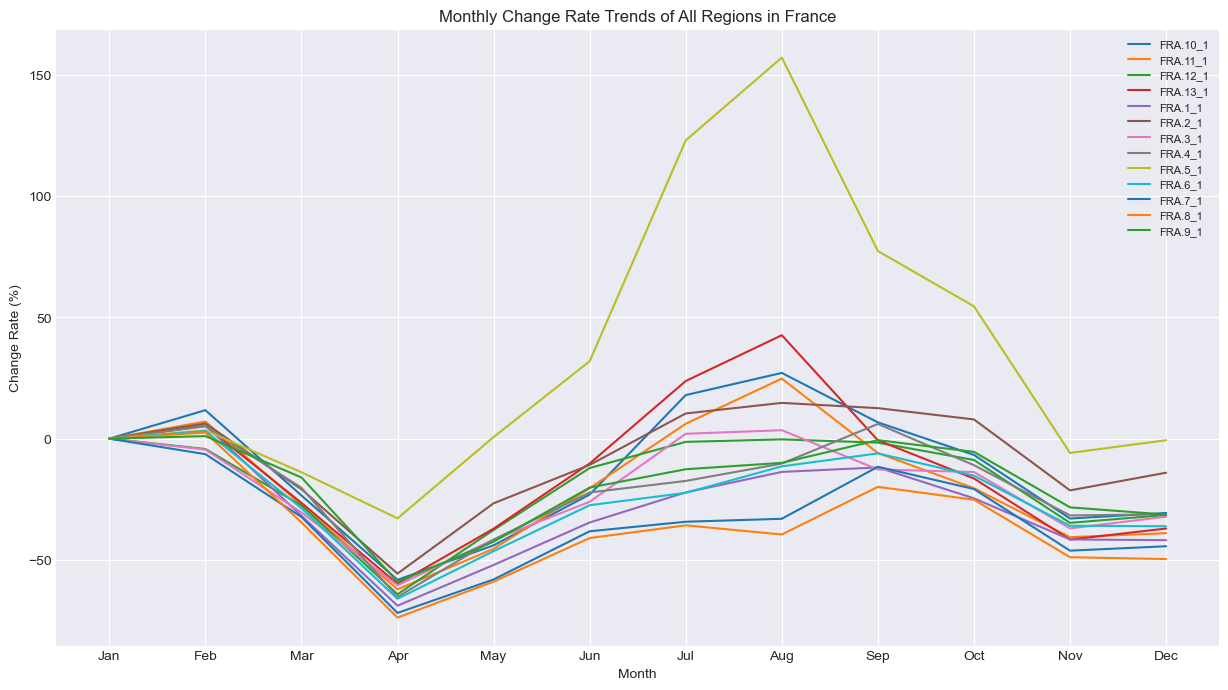



--------------- Done ---------------




In [578]:
print("\n\n-------------- Running code --------------\n\n")
exec(all_code)
print("\n\n--------------- Done ---------------\n\n")

In [579]:
stop

NameError: name 'stop' is not defined